In [1]:
from keras.datasets import cifar10

2022-05-05 09:27:00.982197: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcudart.so.11.0


In [2]:
(train_image, train_label), (test_image, test_label) = cifar10.load_data()

In [3]:
print('train : ', len(train_image))
print('test : ', len(test_image))

train :  50000
test :  10000


In [4]:
print(train_image.shape)

(50000, 32, 32, 3)


In [5]:
import matplotlib.pyplot as plt
def show_image(image):
    plt.imshow(image)
    plt.show()

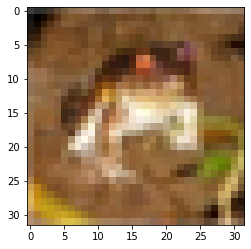

In [6]:
show_image(train_image[0])

In [7]:
print(train_image[0])

[[[ 59  62  63]
  [ 43  46  45]
  [ 50  48  43]
  ...
  [158 132 108]
  [152 125 102]
  [148 124 103]]

 [[ 16  20  20]
  [  0   0   0]
  [ 18   8   0]
  ...
  [123  88  55]
  [119  83  50]
  [122  87  57]]

 [[ 25  24  21]
  [ 16   7   0]
  [ 49  27   8]
  ...
  [118  84  50]
  [120  84  50]
  [109  73  42]]

 ...

 [[208 170  96]
  [201 153  34]
  [198 161  26]
  ...
  [160 133  70]
  [ 56  31   7]
  [ 53  34  20]]

 [[180 139  96]
  [173 123  42]
  [186 144  30]
  ...
  [184 148  94]
  [ 97  62  34]
  [ 83  53  34]]

 [[177 144 116]
  [168 129  94]
  [179 142  87]
  ...
  [216 184 140]
  [151 118  84]
  [123  92  72]]]


In [8]:
print(train_image[0][0][0])

[59 62 63]


In [9]:
print(train_label[0])

[6]


In [10]:
train_image_normalize = train_image.reshape(50000, 32, 32, 3) / 255
test_image_normalize = test_image.reshape(10000, 32, 32, 3) / 255

In [11]:
print(train_image_normalize[0][0][0])

[0.23137255 0.24313725 0.24705882]


In [12]:
print(train_label[:3])

[[6]
 [9]
 [9]]


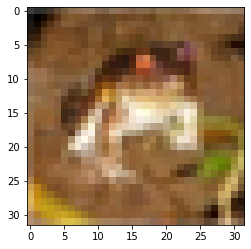

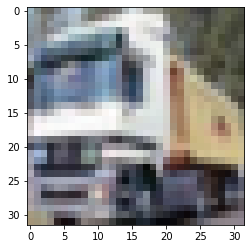

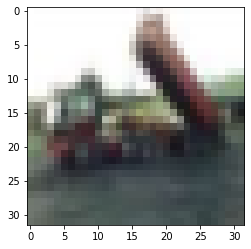

In [13]:
show_image(train_image[0])
show_image(train_image[1])
show_image(train_image[2])

In [14]:
from keras.utils import np_utils
train_label_onehotencoding = np_utils.to_categorical(train_label)
test_label_onehotencoding = np_utils.to_categorical(test_label)

In [15]:
print(train_label_onehotencoding.shape)

(50000, 10)


In [16]:
print(train_label_onehotencoding[0:3])

[[0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]]


In [17]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Conv2D, MaxPooling2D, Flatten

In [18]:
model = Sequential()

2022-05-05 09:27:03.781527: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcuda.so.1
2022-05-05 09:27:03.819736: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1733] Found device 0 with properties: 
pciBusID: 0000:23:00.0 name: NVIDIA RTX A5000 computeCapability: 8.6
coreClock: 1.695GHz coreCount: 64 deviceMemorySize: 23.69GiB deviceMemoryBandwidth: 715.34GiB/s
2022-05-05 09:27:03.819771: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcudart.so.11.0
2022-05-05 09:27:03.822146: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcublas.so.11
2022-05-05 09:27:03.822173: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcublasLt.so.11
2022-05-05 09:27:03.822858: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcufft.so.

In [19]:
model.add(Conv2D(filters=32, kernel_size=(3,3), padding='same', input_shape=(32,32,3), activation = 'relu'))

In [20]:
model.add(MaxPooling2D(pool_size = (2,2)))

In [21]:
model.add(Conv2D(filters=64, kernel_size=(3,3), padding='same', activation = 'relu'))

In [22]:
model.add(MaxPooling2D(pool_size = (2,2)))

In [23]:
model.add(Dropout(0.25))

In [24]:
model.add(Flatten())

In [25]:
model.add(Dense(1024, kernel_initializer = 'normal', activation = 'relu'))

In [26]:
model.add(Dropout(0.5))

In [27]:
model.add(Dense(units = 10, kernel_initializer = 'normal', activation = 'softmax'))

In [28]:
print(model.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 32, 32, 32)        896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 16, 16, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 8, 8, 64)          0         
_________________________________________________________________
dropout (Dropout)            (None, 8, 8, 64)          0         
_________________________________________________________________
flatten (Flatten)            (None, 4096)              0         
_________________________________________________________________
dense (Dense)                (None, 1024)              4

In [29]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [30]:
train_history = model.fit(train_image_normalize, train_label_onehotencoding, validation_split=0.2, epochs=10, batch_size=200, verbose=2)

2022-05-05 09:27:05.435809: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:176] None of the MLIR Optimization Passes are enabled (registered 2)
2022-05-05 09:27:05.438172: I tensorflow/core/platform/profile_utils/cpu_utils.cc:114] CPU Frequency: 2794895000 Hz


Epoch 1/10


2022-05-05 09:27:19.408732: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcudnn.so.8
2022-05-05 09:27:20.013577: I tensorflow/stream_executor/cuda/cuda_dnn.cc:359] Loaded cuDNN version 8101
2022-05-05 09:27:20.722154: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcublas.so.11
2022-05-05 09:27:21.221672: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcublasLt.so.11
2022-05-05 09:27:21.237748: I tensorflow/stream_executor/cuda/cuda_blas.cc:1838] TensorFloat-32 will be used for the matrix multiplication. This will only be logged once.


200/200 - 17s - loss: 1.6254 - accuracy: 0.4135 - val_loss: 1.2787 - val_accuracy: 0.5601
Epoch 2/10
200/200 - 1s - loss: 1.2113 - accuracy: 0.5674 - val_loss: 1.1132 - val_accuracy: 0.6106
Epoch 3/10
200/200 - 1s - loss: 1.0527 - accuracy: 0.6255 - val_loss: 0.9779 - val_accuracy: 0.6566
Epoch 4/10
200/200 - 1s - loss: 0.9408 - accuracy: 0.6704 - val_loss: 0.9146 - val_accuracy: 0.6778
Epoch 5/10
200/200 - 1s - loss: 0.8610 - accuracy: 0.6989 - val_loss: 0.8826 - val_accuracy: 0.6881
Epoch 6/10
200/200 - 1s - loss: 0.7807 - accuracy: 0.7266 - val_loss: 0.8163 - val_accuracy: 0.7178
Epoch 7/10
200/200 - 1s - loss: 0.7141 - accuracy: 0.7498 - val_loss: 0.8048 - val_accuracy: 0.7175
Epoch 8/10
200/200 - 1s - loss: 0.6569 - accuracy: 0.7711 - val_loss: 0.7822 - val_accuracy: 0.7342
Epoch 9/10
200/200 - 1s - loss: 0.5950 - accuracy: 0.7939 - val_loss: 0.7657 - val_accuracy: 0.7414
Epoch 10/10
200/200 - 1s - loss: 0.5419 - accuracy: 0.8112 - val_loss: 0.7497 - val_accuracy: 0.7486


In [32]:
scores = model.evaluate(test_image_normalize, test_label_onehotencoding)
print(scores)

313/313 [==============================] - 1s 3ms/step - loss: 0.7666 - accuracy: 0.7349
[0.7665884494781494, 0.7348999977111816]


In [33]:
from keras.models import load_model

In [34]:
model.save('CIFAR10_CNN.h5')